In [36]:
#KNN

In [37]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris 

# Load the iris dataset
iris_dataset = load_iris() 

# Display the feature names of the iris dataset
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
# Display target names of iris dataset
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
# Create a DataFrame from iris dataset
df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names) 

# Display some rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
# Add target column to the DataFrame
df['target'] = iris_dataset.target 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
# Map target values to flower names and add as a new column
df['flower_name'] = df.target.apply(lambda x: iris_dataset.target_names[x]) 
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [42]:
# Display the first few rows where the target is 1 (versicolor)
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [43]:
# Display rows 45 to 54 of DataFrame
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [44]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

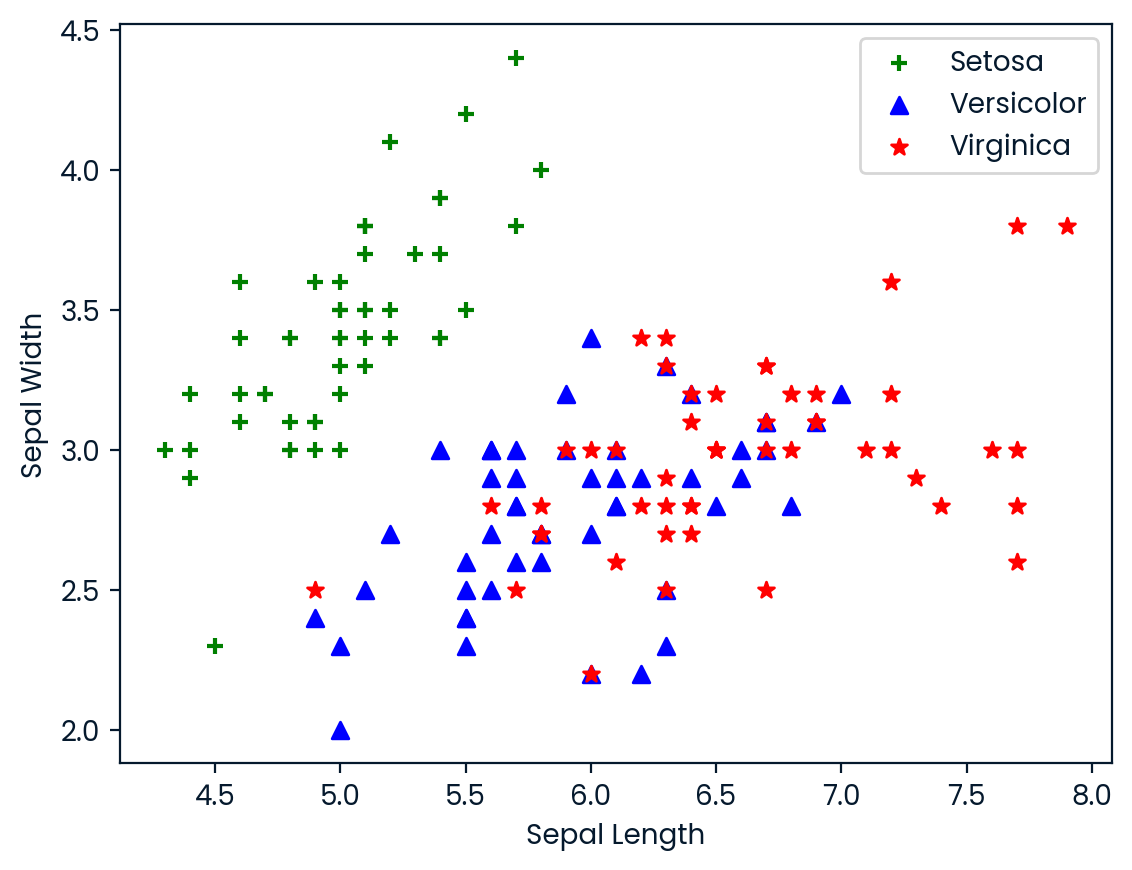

In [45]:
import matplotlib.pyplot as plt

# Set labels for x and y axes
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Plot scatter plot for each subset of the DataFrame with different colors and markers
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker='+', label='Setosa')

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="blue", marker='^', label='Versicolor')

plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color="red", marker='*', label='Virginica')

# Add legend to the plot to differentiate between species
plt.legend()

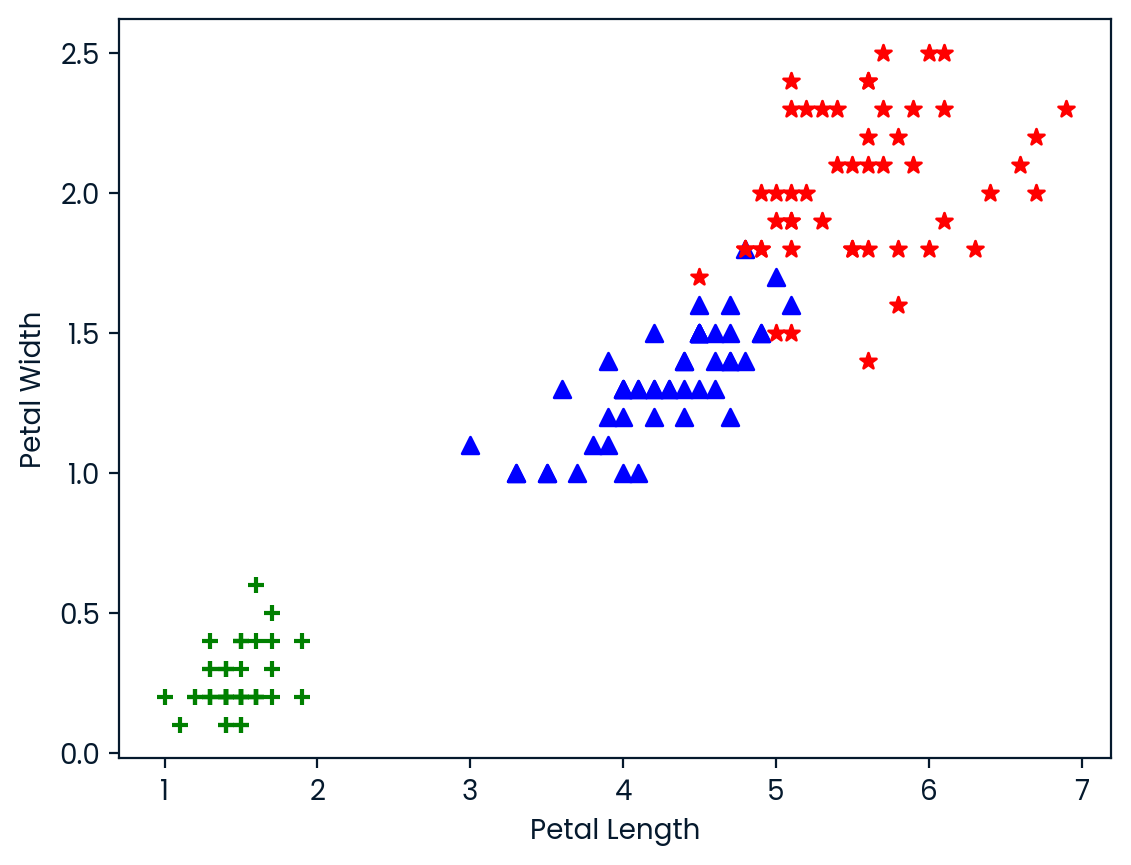

In [46]:
# Set labels for x and y axes to Petal Length and Petal Width
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+')

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='^')

plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="red", marker='*')

In [47]:
from sklearn.model_selection import train_test_split

# Drop the target and flower_name columns to create feature set
x = df.drop(['target', 'flower_name'], axis='columns')

# Define the target variable
y = df.target

# Split the dataset into training and testing sets
# test_size=0.3 means 30% of the data will be used for testing, and 70% for training
# random_state=42 ensures reproducibility of the split by setting a seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.neighbors import KNeighborsClassifier 

# Initialize K-Nearest Neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

In [49]:
# Train the K-Nearest Neighbors classifier using the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
# Evaluate the accuracy of the K-Nearest Neighbors classifier on the test data
knn.score(X_test, y_test)

1.0

In [51]:
from sklearn.metrics import confusion_matrix

# Predict the target values for the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix to evaluate the accuracy of the classification
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

Text(94.72222222222221, 0.5, 'Truth')

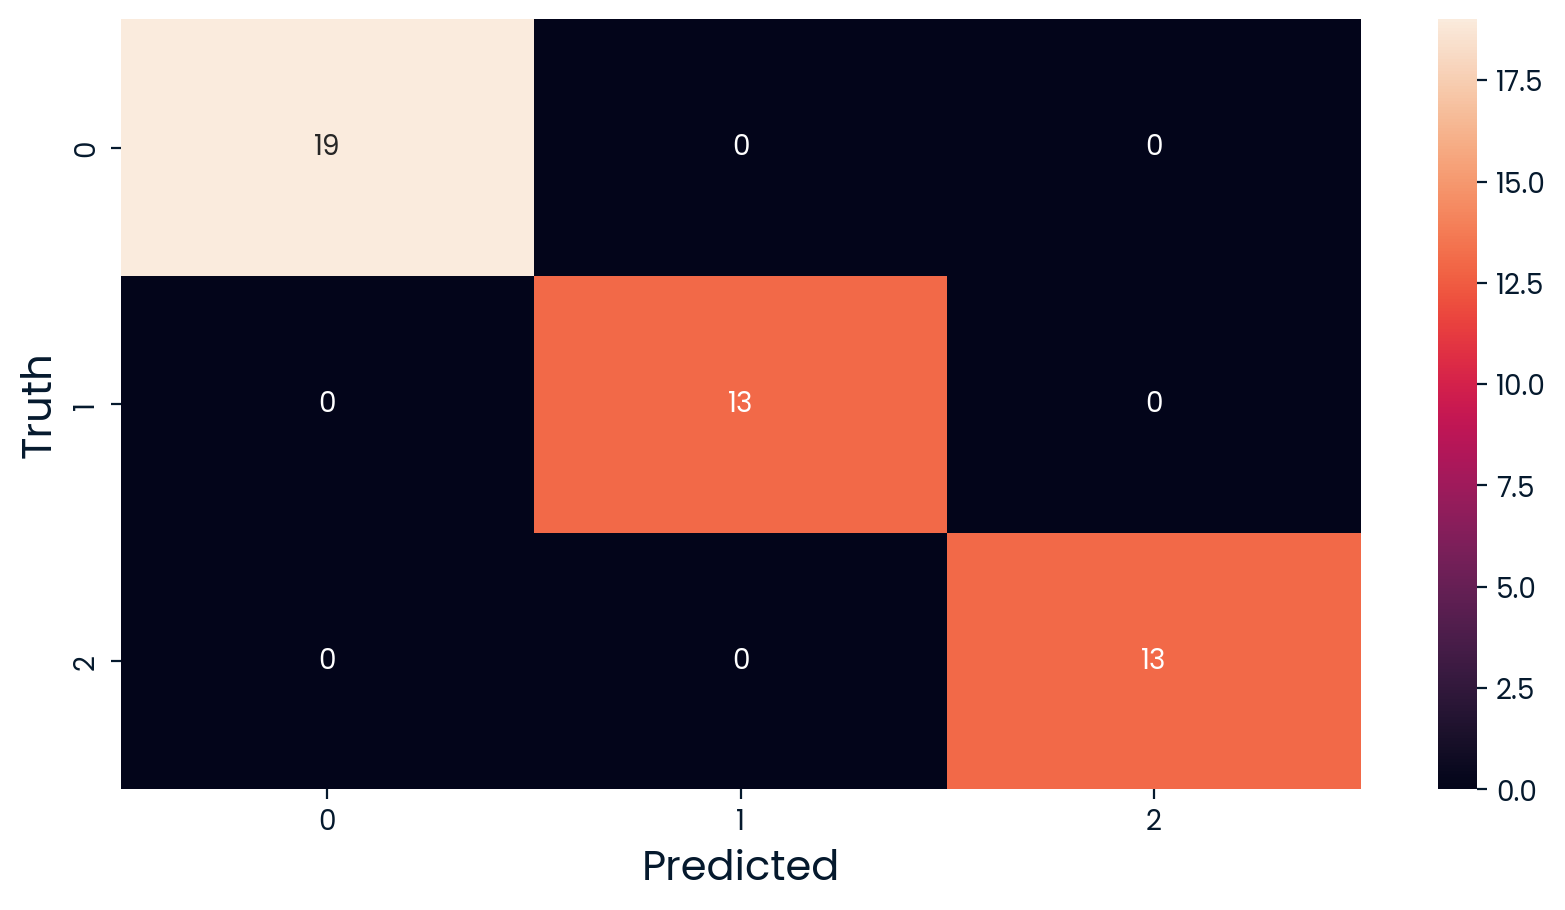

In [52]:
import seaborn as sn

# Set the figure size for the heatmap
plt.figure(figsize=(10,5))

# Create a heatmap to visualize the confusion matrix
sn.heatmap(cm, annot=True)

# Set the labels for the x and y axes
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Truth', fontsize=15)

In [53]:
from sklearn.metrics import classification_report

# Generate and display the classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        19\n           1       1.00      1.00      1.00        13\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

In [54]:
#DECISION TREE

In [55]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [56]:
# Load the iris dataset
iris = load_iris()

# Extract features and target variables
X = iris.data
y = iris.target

# Get feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names

In [57]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
dt = DecisionTreeClassifier()

In [59]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# Predict the target values for the test set using the trained Decision Tree model
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [61]:
# Calculate and display the accuracy of the Decision Tree model
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")

Decision Tree Accuracy: 1.00


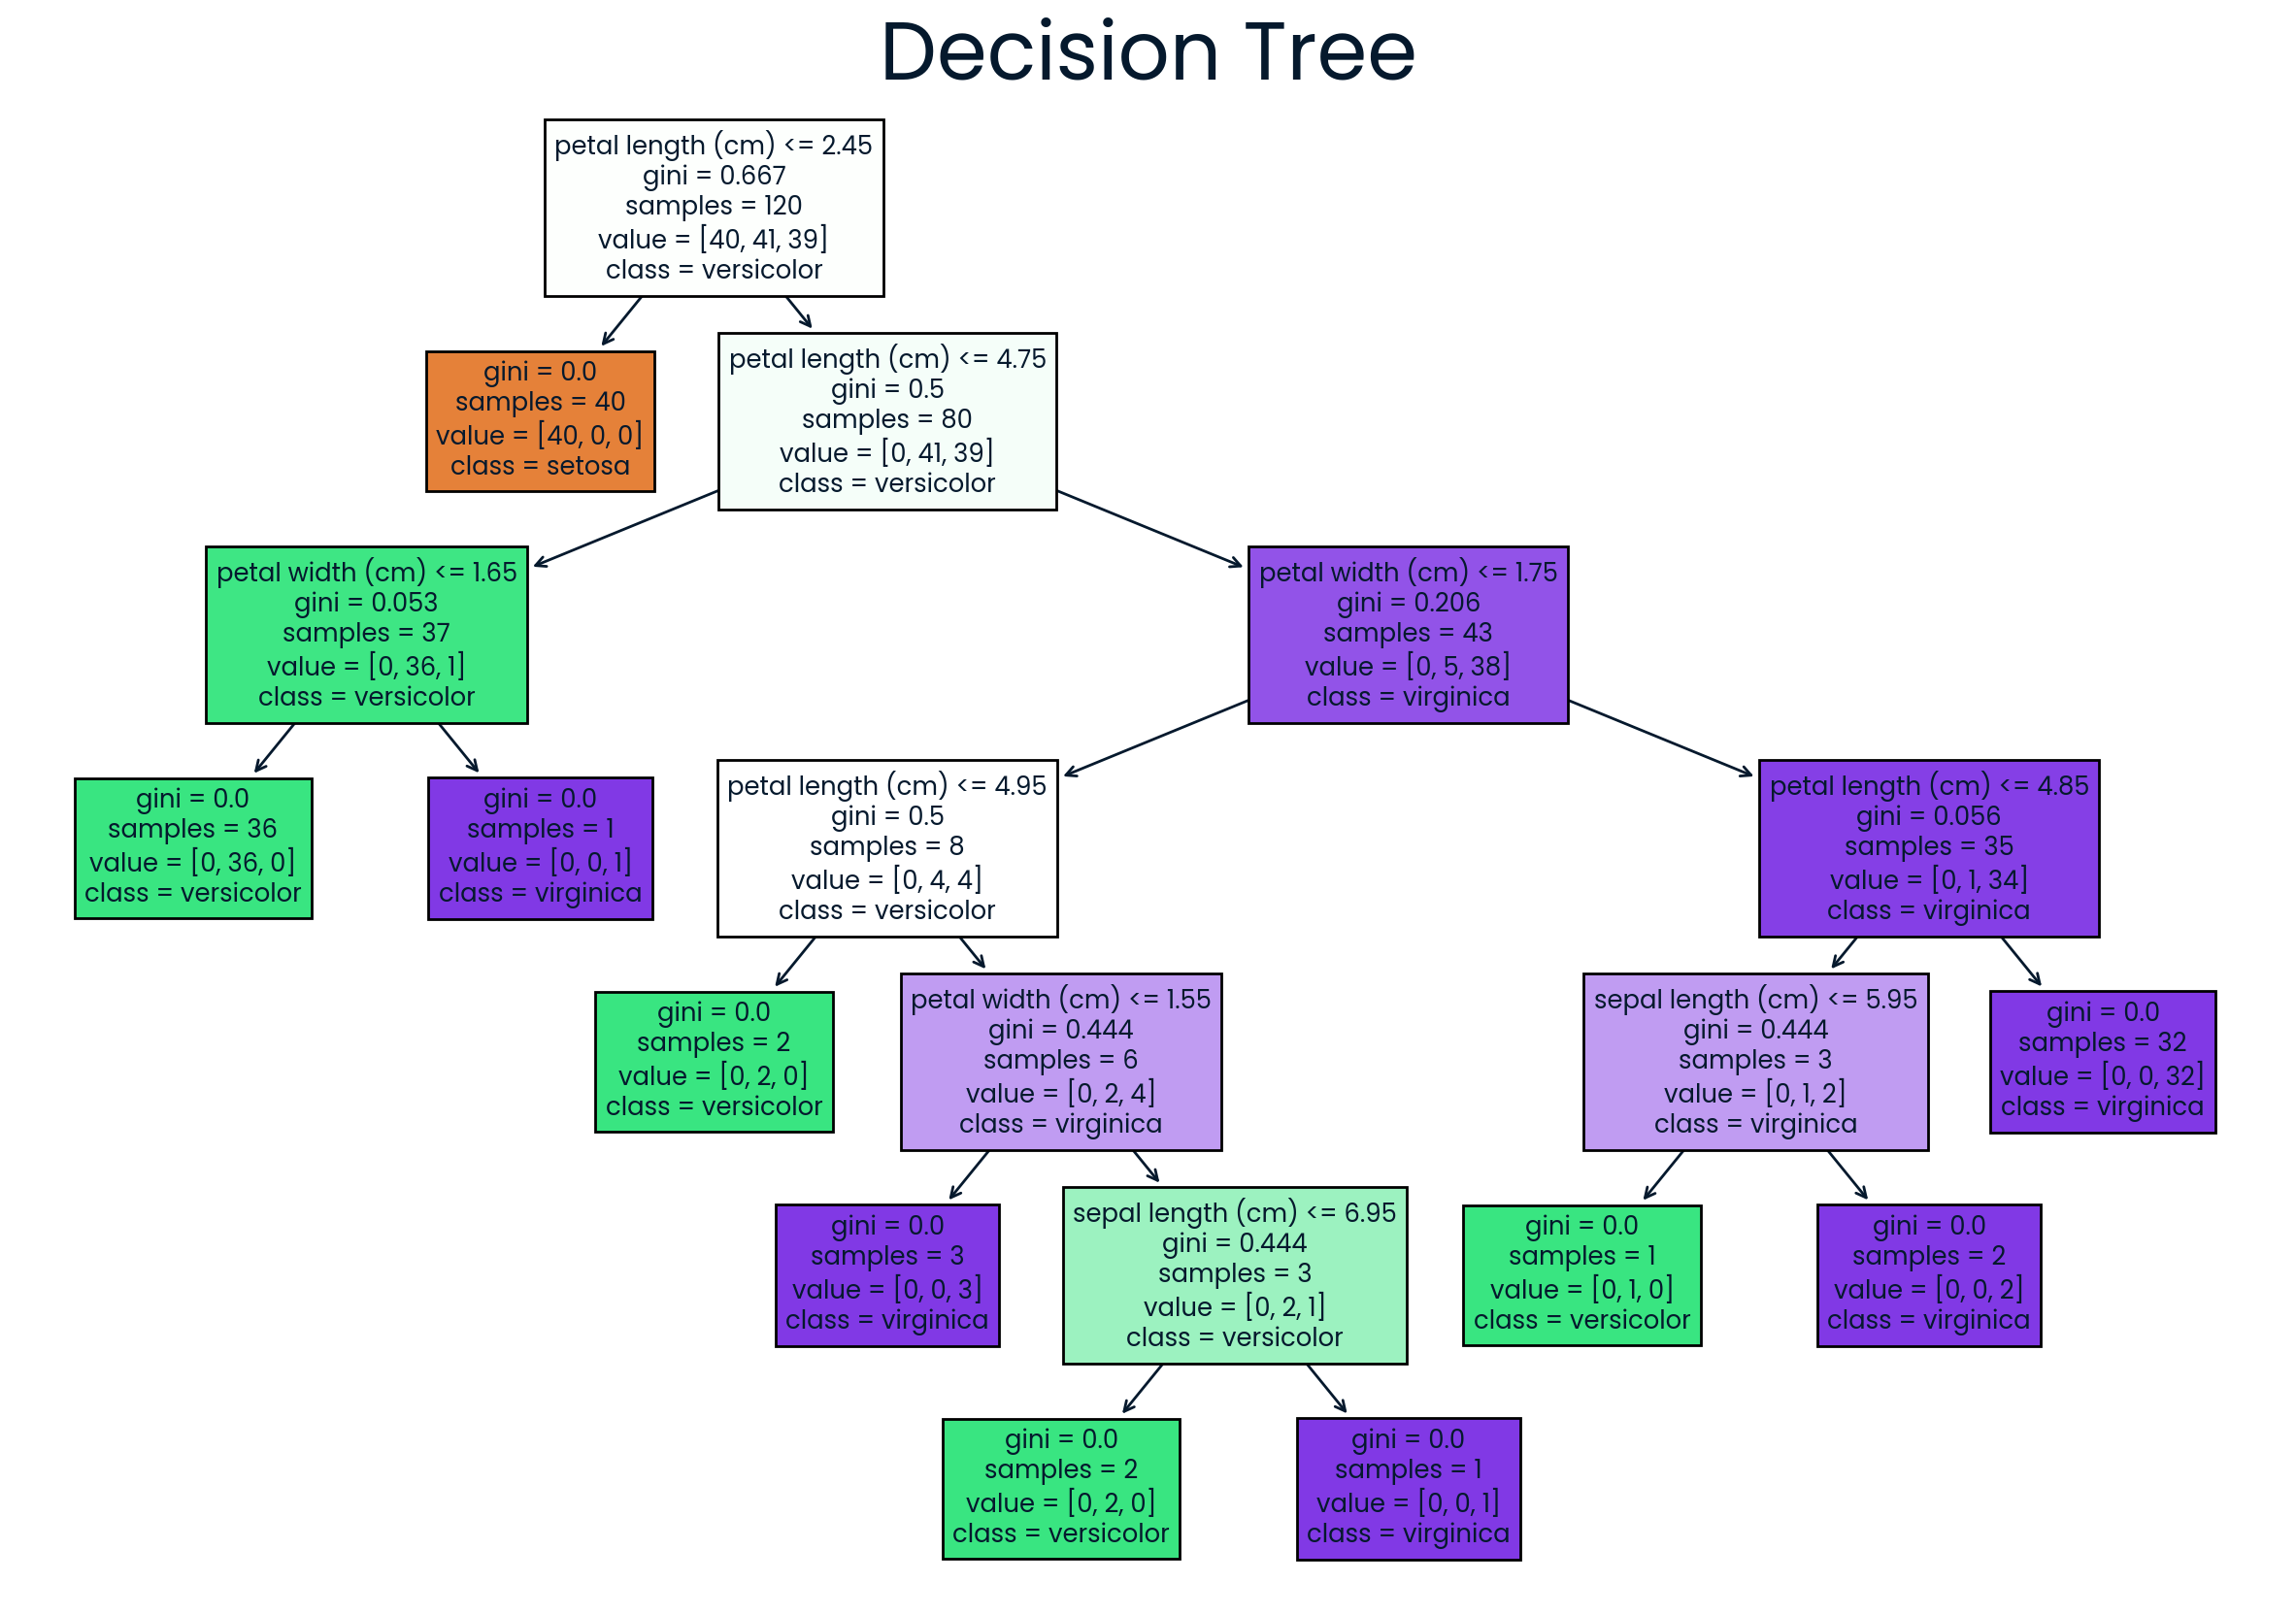

In [62]:
# Plot the decision tree with feature and class names
plt.figure(figsize=(15,10))  # Set the size of the plot
plot_tree(dt, filled=True, feature_names=feature_names, class_names=target_names)  # Plot the decision tree with filled nodes, feature names, and class names
plt.title('Decision Tree', fontsize=30)  # Set the title of the plot with a font size of 30
plt.show()  # Display the plot

In [63]:
#RANDOM FOREST

In [64]:
# Import the RandomForestClassifier from the sklearn.ensemble module
from sklearn.ensemble import RandomForestClassifier  

In [65]:
# Initialize the Random Forest Classifier with 150 trees and a fixed random state for reproducibility
rf = RandomForestClassifier(n_estimators=150, random_state=42)

In [66]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [67]:
# Predict the target values for the test set using the trained Random Forest model
y_pred_rf = rf.predict(X_test)

y_pred_rf

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [68]:
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

Random Forest Accuracy: 1.00
